# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

nvidia_filename = os.path.join(os.getcwd(), "data", "Lab8_NvidiaDailyPrices.csv")
duk_filename = os.path.join(os.getcwd(), "data", "DUK.csv")

df = pd.read_csv(duk_filename)

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-02,87.839996,88.730003,87.550003,88.120003,71.723061,3228900
1,2019-08-05,88.480003,88.849998,86.529999,86.959999,70.778915,3969200
2,2019-08-06,87.300003,89.430000,86.309998,88.919998,72.374214,3943300
3,2019-08-07,88.910004,89.500000,87.839996,88.839996,72.309105,2630100
4,2019-08-08,88.419998,89.519997,88.339996,89.309998,72.691643,2252100


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. The dataset chosen consists of historical Duke Energy Corporation (DUK) stock prices from the past 5 years to today's current date. It records daily prices including open, high, low, close, adj close, and volume traded. It counts every day that the market is open.
2. We will be predicting the closing price of a stock for the current date. The label is the closing price of the stock for the current date.
3. This is a supervised learning regression problem. Since this is a regression problem, binary vs multi-class classification does not apply.
4. Open price, closing price, and volume traded for the day.
5. Predicting stock prices is crucial for investment firms/hedge funds/individual traders. A model like this can serve as a foundational model that can be integrated into trading algorithms to automate trades, eventually offering significant value by utilizing predictive analytics for financial profit. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

1. I would like to address missingness by replacing missing values(if any) with the mean or median of the corresponding feature. I would also like to select the appropriate features and remove irrelevant features that I decide shouldn't be included in the dataset after the analysis.
2. I want to use a neural network regression model, specifically an LSTM model since they have been proven to perform well for this kind of stock prediction problem.

In [3]:
print(df.shape)
df.head()

(1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-02,87.839996,88.730003,87.550003,88.120003,71.723061,3228900
1,2019-08-05,88.480003,88.849998,86.529999,86.959999,70.778915,3969200
2,2019-08-06,87.300003,89.430000,86.309998,88.919998,72.374214,3943300
3,2019-08-07,88.910004,89.500000,87.839996,88.839996,72.309105,2630100
4,2019-08-08,88.419998,89.519997,88.339996,89.309998,72.691643,2252100


In [4]:
print(df.describe())
print(df.dtypes)

              Open         High          Low        Close    Adj Close  \
count  1259.000000  1259.000000  1259.000000  1259.000000  1259.000000   
mean     96.232280    97.101461    95.351779    96.241620    87.425059   
std       7.954595     7.899303     8.015759     7.974735     9.942506   
min      66.389999    67.930000    62.130001    64.150002    53.864094   
25%      90.654999    91.420002    89.949997    90.694999    79.426072   
50%      96.059998    96.620003    95.269997    96.080002    89.033249   
75%     101.845001   102.654999   101.050003   101.865002    94.232963   
max     115.510002   116.669998   115.169998   115.430000   113.919998   

             Volume  
count  1.259000e+03  
mean   3.167092e+06  
std    1.300886e+06  
min    7.335000e+05  
25%    2.391250e+06  
50%    2.912100e+06  
75%    3.625000e+06  
max    1.880490e+07  
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume   

In [5]:
null_values = df.isnull().sum()
print(null_values)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [6]:
correlation_matrix = df.corr()

print(correlation_matrix)

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.994567  0.994590  0.989363   0.871798 -0.280043
High       0.994567  1.000000  0.992813  0.994632   0.873887 -0.256706
Low        0.994590  0.992813  1.000000  0.995158   0.876356 -0.307954
Close      0.989363  0.994632  0.995158  1.000000   0.878907 -0.282971
Adj Close  0.871798  0.873887  0.876356  0.878907   1.000000 -0.277280
Volume    -0.280043 -0.256706 -0.307954 -0.282971  -0.277280  1.000000


In [7]:
df = df[['Date', 'Close']]
df.head()

,Date,Close
0,2019-08-02,88.120003
1,2019-08-05,86.959999
2,2019-08-06,88.919998
3,2019-08-07,88.839996
4,2019-08-08,89.309998


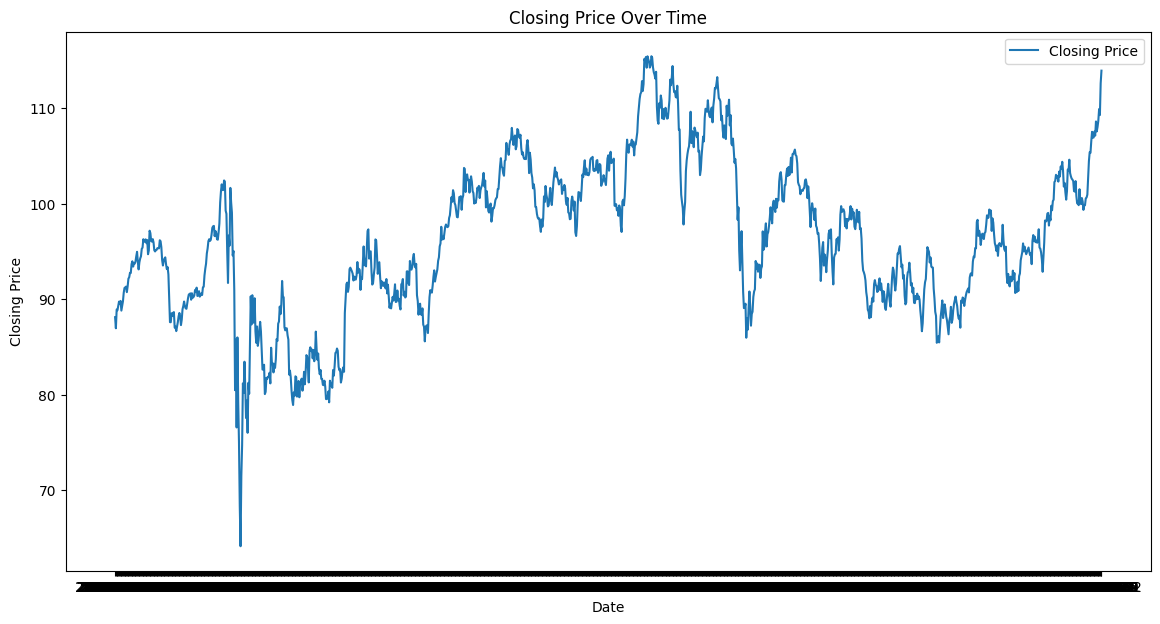

In [8]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price Over Time')
plt.legend()

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. After inspecting the data and the correlation between features in the dataset, I have decided to keep the closing prices for the past three days as features for modeling(I will convert and demonstrate this in the next step). The previous closing prices most directly influences the prediction for the current day's closing price, and including the other price details does not seem like a good idea because they are so closely correlated with closing price, it will only be recapturing the same patterns by doing so. Volume also seems very loosely correlated to the closing price so that will be taken out of the features list.

2. I did not have to handle amputating missing values since there were none. However in the next step I will have to prepare the features correctly by applying feature engineering and creating lag features and associating the past 3 days' closing prices as features for the current date. I will apply this to every row.
3. I will use a neural network regression model, specifically an LSTM model since they have been proven to perform well for this kind of stock prediction regression problem.
4. The plan to train the model involves compiling it with the mean squared error loss function and the Adam optimizer with a learning rate of between 0.001-0.5, then fitting it to the training data for some number of epochs (most likely 50-150), and validating it on a separate validation set. Performance will be analyzed using the mean absolute error on both training / validation sets to check overfitting + ensure the model generalizes well to new data.
  
To improve the model, I will consider hyperparameter tuning (learning rate, number of layers and epochs, and units). If necessary I will experiment with possibly increasing the training data size and making it extend past 5 years.

To display its performance, I will isolate training/validation/test sets and display them on graphs only compared to each other(prediction vs observation). Then the final graph will be all sets combined with each other to observe the model's performance as a whole.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [9]:
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

<!-- df['Date'] = df['Date'].apply(str_to_datetime)
df['Date'] -->

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0      2019-08-02
1      2019-08-05
2      2019-08-06
3      2019-08-07
4      2019-08-08
          ...    
1254   2024-07-29
1255   2024-07-30
1256   2024-07-31
1257   2024-08-01
1258   2024-08-02
Name: Date, Length: 1259, dtype: datetime64[ns]

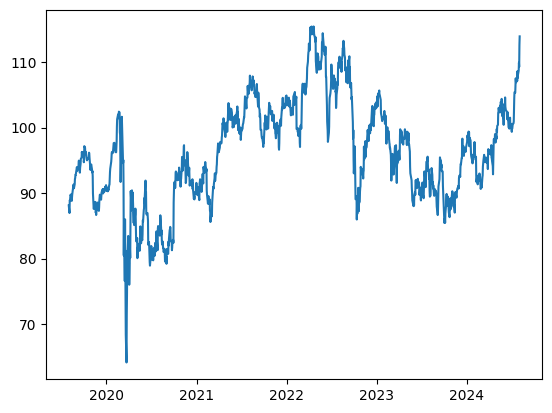

In [11]:
plt.plot(df['Date'], df['Close'])

In [12]:
# sort by date
df = df.sort_values(by='Date')

# create lag features for past 3 days' closing prices
df['Close_lag1'] = df['Close'].shift(1)
df['Close_lag2'] = df['Close'].shift(2)
df['Close_lag3'] = df['Close'].shift(3)
df = df.dropna()

# reorder columns
df = df[['Date', 'Close_lag3', 'Close_lag2', 'Close_lag1','Close']]

# select features and label variable
features = ['Close_lag1', 'Close_lag2', 'Close_lag3']
target = 'Close'

# prepare X (features) and y (label)
X = df[features].values
y = df[target].values

print(df.head())

        Date  Close_lag3  Close_lag2  Close_lag1      Close
3 2019-08-07   88.120003   86.959999   88.919998  88.839996
4 2019-08-08   86.959999   88.919998   88.839996  89.309998
5 2019-08-09   88.919998   88.839996   89.309998  89.750000
6 2019-08-12   88.839996   89.309998   89.750000  89.500000
7 2019-08-13   89.309998   89.750000   89.500000  89.820000


In [13]:
# convert df to np array, extract dates/features/labels, reshape the features for the upcoming model

df_as_np = df.to_numpy()

dates = df_as_np[:, 0]

middle_matrix = df_as_np[:, 1:-1]
X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1)).astype(str)
X = X.astype(np.float32)

Y = df_as_np[:, -1].astype(str)
y = Y.astype(np.float32)

#double-check shapes
dates.shape, X.shape, y.shape

((1256,), (1256, 3, 1), (1256,))

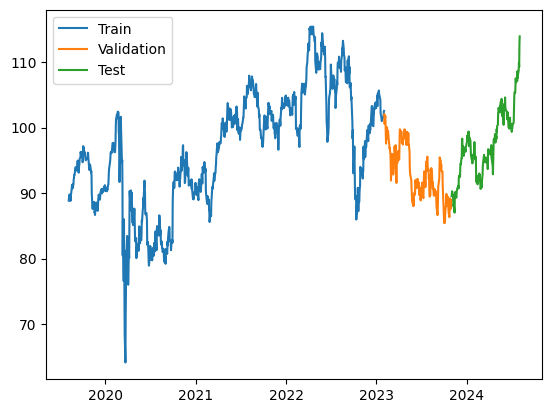

In [14]:

# split into training data and remaining val/test data
dates_train, dates_rem, X_train, X_rem, y_train, y_rem = train_test_split(
    dates, X, y, train_size=0.7, random_state=42, shuffle=False)

# split second half into validation and test
dates_val, dates_test, X_val, X_test, y_val, y_test = train_test_split(
    dates_rem, X_rem, y_rem, test_size=0.5, random_state=42, shuffle=False)

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)
model.summary

2024-08-03 01:51:41.412727: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-08-03 01:51:41.412755: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2024-08-03 01:51:42.417795: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-08-03 01:51:42.417830: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2024-08-03 01:51:42.417848: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (i-0cf1d86de15a7cef9): /proc/driver/nvidia/version does not exist
2024-08-03 01:51:42.418059: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-03 01:51:42.842060: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the

Epoch 1/50
28/28 [==============================] - 1s 13ms/step - loss: 9005.6162 - mean_absolute_error: 94.4689 - val_loss: 7812.6870 - val_mean_absolute_error: 88.3002
Epoch 2/50
28/28 [==============================] - 0s 2ms/step - loss: 7559.5894 - mean_absolute_error: 86.3840 - val_loss: 5372.6631 - val_mean_absolute_error: 73.1824
Epoch 3/50
28/28 [==============================] - 0s 2ms/step - loss: 3566.5859 - mean_absolute_error: 57.6001 - val_loss: 810.7472 - val_mean_absolute_error: 28.1693
Epoch 4/50
28/28 [==============================] - 0s 2ms/step - loss: 287.4073 - mean_absolute_error: 13.3905 - val_loss: 103.6320 - val_mean_absolute_error: 9.3683
Epoch 5/50
28/28 [==============================] - 0s 2ms/step - loss: 90.5983 - mean_absolute_error: 7.6913 - val_loss: 22.0632 - val_mean_absolute_error: 4.0380
Epoch 6/50
28/28 [==============================] - 0s 2ms/step - loss: 75.1099 - mean_absolute_error: 7.2374 - val_loss: 15.9039 - val_mean_absolute_error: 3.

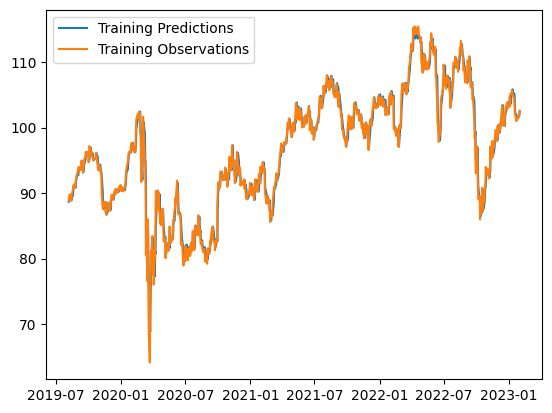

In [16]:
train_predictions = model.predict(X_train)

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

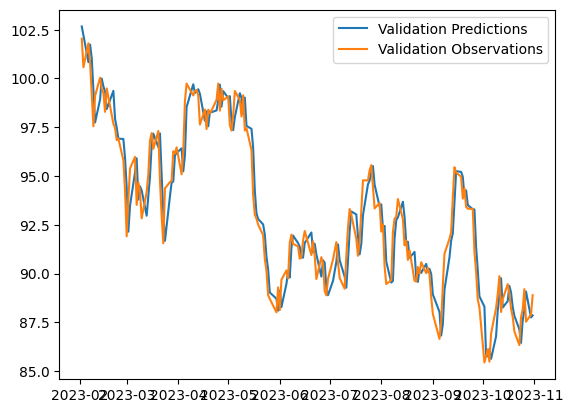

In [17]:
val_predictions = model.predict(X_val)

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

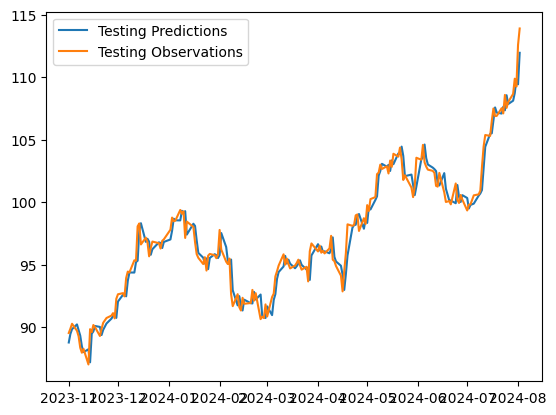

In [18]:
test_predictions = model.predict(X_test)

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

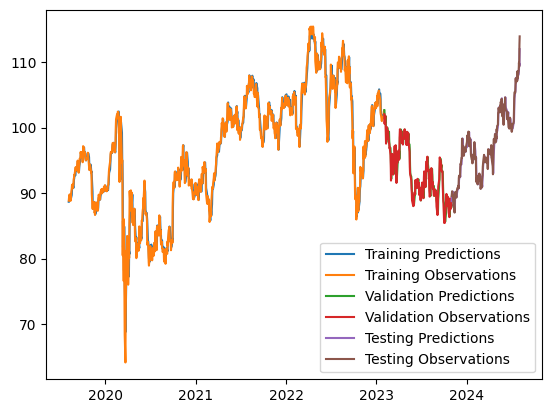

In [19]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])